# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 5. Вероятность. 


**Правила, <font color="red">прочитайте внимательно</font>:**


* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

---


**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 35 баллов за контест и 5 баллов за ноутбук
* Задача 2 &mdash; 20 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 40 баллов

In [63]:
# Bot check

# HW_ID: fpmi_ad5
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid', font_scale=1.3, palette='Set2')
%matplotlib inline

### <font color="blue"><i>Легкая часть</i></font>


### Задача 1.

Условие задачи в контесте, ссылка на который отправлена через бот.

Продублируйте сюда написанный код и постройте требуемые графики, которые при необходимости можно доработать.

In [65]:
import scipy.stats as sps

In [66]:
coin = sps.bernoulli(p=0.5).rvs
uniform_pdf = sps.uniform.pdf
norm_pdf = sps.norm.pdf
expon_pdf = sps.expon.pdf

##### <font color="green"><i>Равномерное распределение на $[0,1]$</i></font>

In [67]:
def uniform(size=1, precision=30):
    ''' U[0,1] через Bern(0.5) '''
    V = np.array(size).prod()
    Toss = np.array((coin(V * precision).reshape(V, precision)))
    degs = ((np.ones(precision) * 2) ** (np.array(range(-precision, 0)))).transpose()
    return ((Toss * degs).sum(axis=1)).reshape(size)

In [68]:
def plot_uniform_density(size=200):
    ''' графическое сравнение плотности выборки и равнемерной сетки '''
    grid = np.linspace(-0.25, 1.25, 500)
    sample = uniform(size)
    plt.figure(figsize=(12, 5))
    plt.hist(sample, bins=10, density=True, color='pink', label='плотность выборки')
    plt.plot(grid, uniform_pdf(grid), color='red', label='плотность сетки')
    plt.scatter(x=sample, y=np.zeros(size), alpha=0.4, color='blue', label='выборка')
    plt.ylim(-0.007, 1.4) # так лучше видно равенство плотности нулю на [-0.25; 0] и [1; 1.25] и легенду
    plt.legend(loc='upper right')
    plt.title('Равномерное распределение $U_{[0, 1]}$')
    plt.grid(ls=':')
    return plt.gcf()

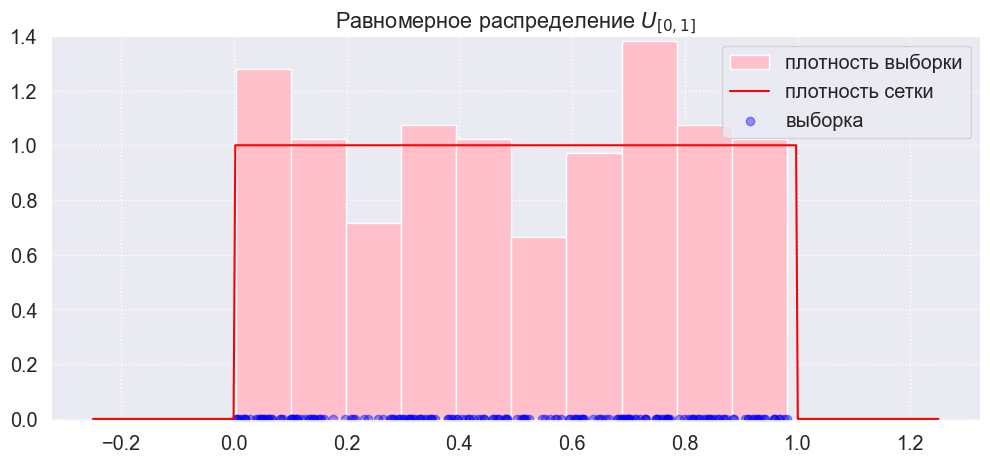

In [69]:
Uniform = plot_uniform_density()

Теперь исследуем, как меняются значения случайных величин в зависимости от precision.

In [70]:
def plot_uniform_different_precision(size=100):
    ''' исследование зависимости значений выборки от precision '''
    plt.figure(figsize=(15, 3))
    for i, precision in enumerate([1, 2, 3, 5, 10, 30]):
        plt.subplot(3, 2, i + 1)
        plt.title('precision=%.0f' %precision, loc='left' if i%2==0 else 'right')
        plt.suptitle('$U_{[0, 1]}$ samples with corresponding precisions\n')
        plt.scatter(uniform(size, precision), np.zeros(size), alpha=0.4)

        plt.yticks([])
        if i < 4:
            plt.xticks([])

    return plt.gcf()

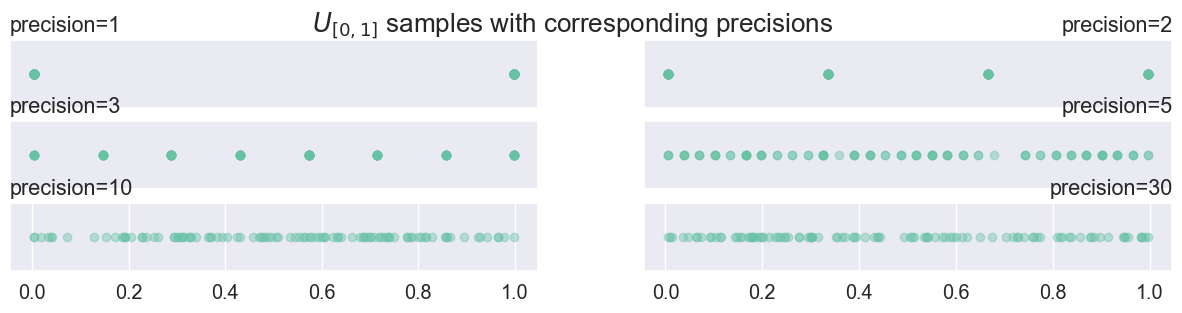

In [71]:
Uniform_dif_precisions = plot_uniform_different_precision()

##### <font color="green"><i>Нормальное распределение на $[-3, 3]$</i></font>

In [72]:
def normal(size=1, loc=0, scale=1, precision=30):
    ''' N[loc, scale^2] через U[0,1] - преобразование Бокса-Мюллера '''
    ksi = np.cos(2 * np.pi * uniform(size, precision)) * np.sqrt(
        (-2) * np.log(uniform(size, precision)))
    return loc + scale * ksi

In [73]:
def plot_normal_density(size=200):
    ''' графическое сравнение плотности выборки и равнемерной сетки '''
    grid = np.linspace(-3, 3, 500)
    sample = normal(size)
    plt.figure(figsize=(11, 5))
    plt.hist(sample, bins=10, density=True, color='pink', label='плотность выборки')
    plt.plot(grid, norm_pdf(grid), color='red', label='плотность сетки')
    plt.scatter(sample, np.zeros(size), alpha=0.4, color='blue', label='выборка')
    plt.legend(loc='upper right')
    plt.title('Нормальное распределение $\mathcal{N}(0,1)$ на $[-3, 3]$')
    plt.grid(ls=':')
    return plt.gcf()

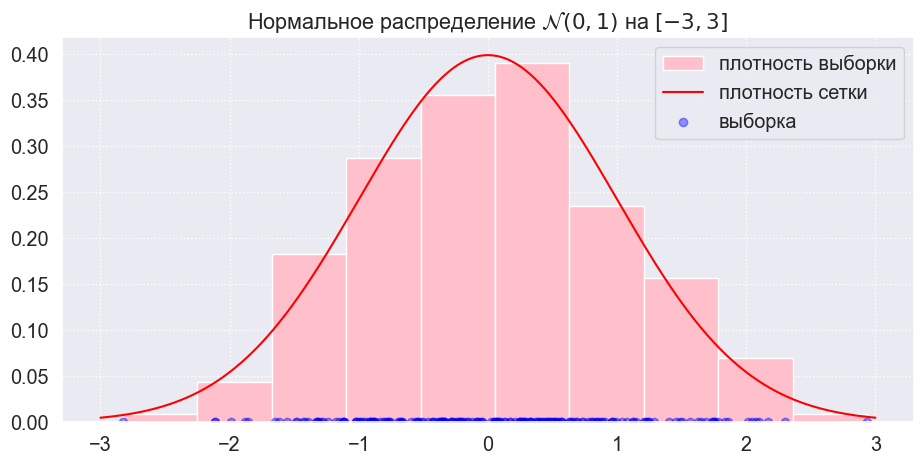

In [74]:
Normal = plot_normal_density()

##### <font color="green"><i>Экспоненциальное распределение на $[-0.5; 5]$</i></font>

In [75]:
def expon(size=1, lambd=1, precision=30):
    ''' Exp(lambd) через U[0,1] '''
    # ksi: F(x) = 1 - e^(-lambd*x)
    # F(ksi) = 1 - e^(-lambd*ksi) = U -- uniform
    # ksi = -ln(1 - U)/lambd
    return -np.log(1 - uniform(size, precision))/lambd

In [76]:
def plot_expon_density(size=100):
    ''' графическое сравнение плотности выборки и равнемерной сетки '''
    grid = np.linspace(-0.5, 5, 500)
    distr = expon(size)
    plt.figure(figsize=(10, 5))
    plt.hist(distr, bins=10, density=True, color='pink', label='плотность выборки')
    plt.plot(grid, expon_pdf(grid), color='red', lw=2, label='плотность сетки')
    plt.scatter(distr, np.zeros(size), alpha=0.4, color='blue', label='выборка')
    plt.ylim(-0.007, 1.1) # так лучше видно равенство плотности нулю на [-0.5; 0]
    plt.legend(loc='upper right')
    plt.title('Экспоненциальное распределение $Exp(1)$ на $[-0.5; 5]$')
    plt.grid(ls=':')
    return plt.gcf()

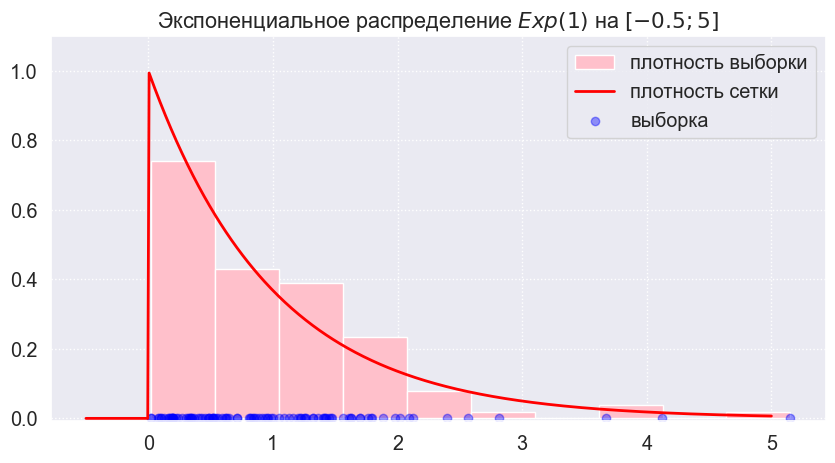

In [77]:
Exponential = plot_expon_density()

#### <font color="green"><i>**Выводы:**</i></font>
Проведённое исследование плотности распределения выборки показывает, что даже при небольшом её размере size=200 в случае равномерного распределения на [0, 1] полученный график(гистограмма плотности) достаточно точно отражает теоретические данные плотности распределения. В случае нормального и экспоненциального распределений размеры выборок оказываются малы, чтобы гистограмма точно аппроксимировалась теоретическим графиком плотности. Само собой разумеется, что при увеличении размеров выборок и количества бинов гистограммы аппроксимация значительно улучшается(что я проверил непосредственно подстановкой size=1000, bins=100).

---

### Задача 2.

Рассмотрим распределение Коши с плотностью
$$p(x) = \frac{1}{\pi(1+x^2)}$$
для $x\in\mathbb{R}$, которое известно своими тяжелыми хвостами. Иначе говоря, плотность убывает медленно при $x \to \infty$. Сравните, например, с нормальным или экспоненциальным распределениями. В частности, из-за этого у распределения Коши даже не существует математического ожидания.

За распределение Коши отвечает класс <a target="_black" href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cauchy.html">`scipy.stats.cauchy`</a>.

**1.** Визуализируйте на одном графики плотности нормального распределения и распределения Коши. Что можно сказать?

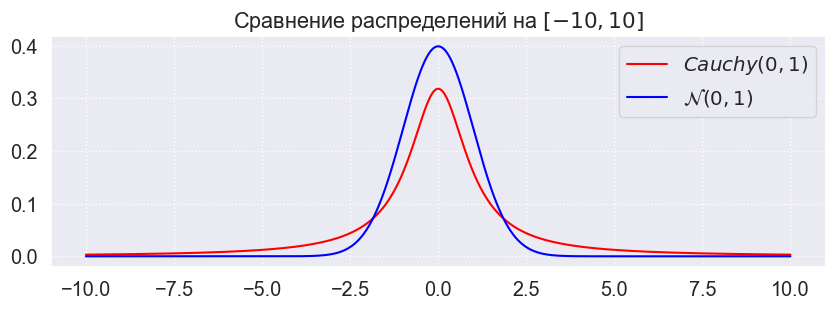

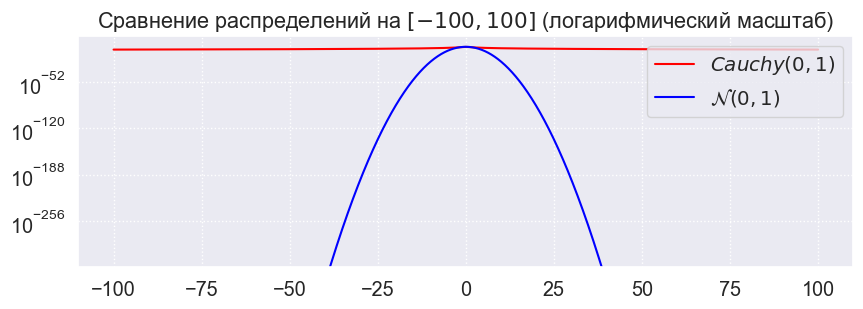

In [78]:
grid = np.linspace(-10, 10, 5000)
plt.figure(figsize=(10, 3))
plt.plot(grid, sps.cauchy.pdf(grid, loc=0, scale=1), color='red', label='$Cauchy(0,1)$')
plt.plot(grid, sps.norm.pdf(grid, loc=0, scale=1), color='blue', label='$\mathcal{N}(0,1)$')
plt.legend(loc='upper right')
plt.title('Сравнение распределений на $[-10, 10]$')
plt.grid(ls=':')

grid = np.linspace(-100, 100, 5000)
plt.figure(figsize=(10, 3))
plt.plot(grid, sps.cauchy.pdf(grid, loc=0, scale=1), color='red', label='$Cauchy(0,1)$')
plt.plot(grid, sps.norm.pdf(grid, loc=0, scale=1), color='blue', label='$\mathcal{N}(0,1)$')
plt.legend(loc='upper right')
plt.title('Сравнение распределений на $[-100, 100]$ (логарифмический масштаб)')
plt.grid(ls=':')
plt.yscale('log')

Действительно, разница заметна: при $x\to \pm \infty$ плотность распределения Коши убывает медленнее, чем у нормального распределения.

**2.** Повторите эксперимент с <a href="https://miptstats.github.io/courses/ad_fivt/lec3_LLN.html">занятия</a> про закон больших чисел для распределения Коши. Выполняется ли закон?

Будем рассматривать распределение $Cauchy(2,1)$.

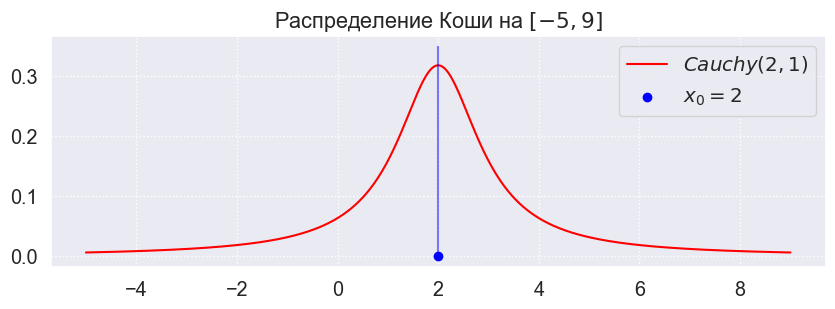

In [79]:
grid = np.linspace(-5, 9, 5000)
plt.figure(figsize=(10, 3))
plt.plot(grid, sps.cauchy.pdf(grid, loc=2, scale=1), color='red', label='$Cauchy(2,1)$')
plt.vlines(2, 0, ymax=0.35, color='blue', alpha=0.5)
plt.scatter(2, 0, color='blue', label='$x_0 = 2$', alpha=1)
plt.legend(loc='upper right')
plt.title('Распределение Коши на $[-5, 9]$')
plt.grid(ls=':')

Проверим выполнен ли закон больших чисел для распределения Коши в случае $loc=2$. То есть предполагаемое среднее выборки равно 2.

In [80]:
size = 1000  # количество случайных величин
samples = sps.cauchy.rvs(size=size, loc=2, scale=1)
cum_means = samples.cumsum()/(np.arange(size) + 1)

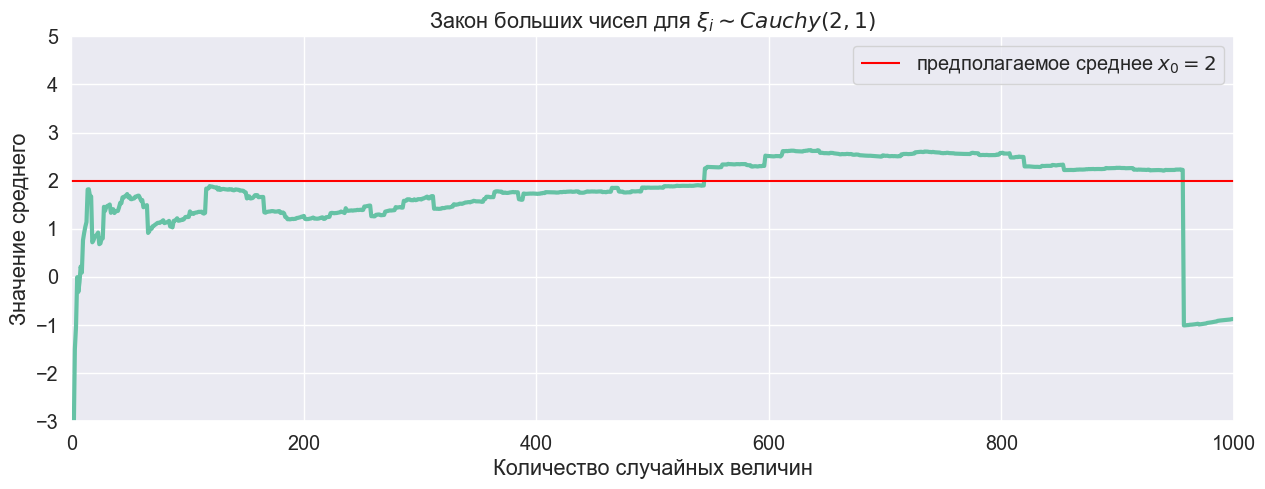

In [81]:
plt.figure(figsize=(15, 5))
plt.plot(cum_means, lw=3)
plt.hlines(2, 0, size, color='red', alpha=1, label='предполагаемое среднее $x_0=2$')
plt.xlabel('Количество случайных величин')
plt.ylabel('Значение среднего')
plt.title('Закон больших чисел для $\\xi_i \\sim Cauchy(2, 1)$')
plt.xlim((0, size));
plt.ylim((-3,5))
plt.legend(loc='best');

На построенном графике гипотеза набирает силу, действительно есть явное стремление к 2.
Сгенерируем 1000 выборок размера 10000:

In [82]:
samples_count = 1000  # количество выборок
size = 10000  # количество случайных величин в каждой выборке
samples = sps.cauchy.rvs(size=(samples_count, size), loc=2, scale=1)
cum_means = samples.cumsum(axis=1)/(np.arange(size) + 1)

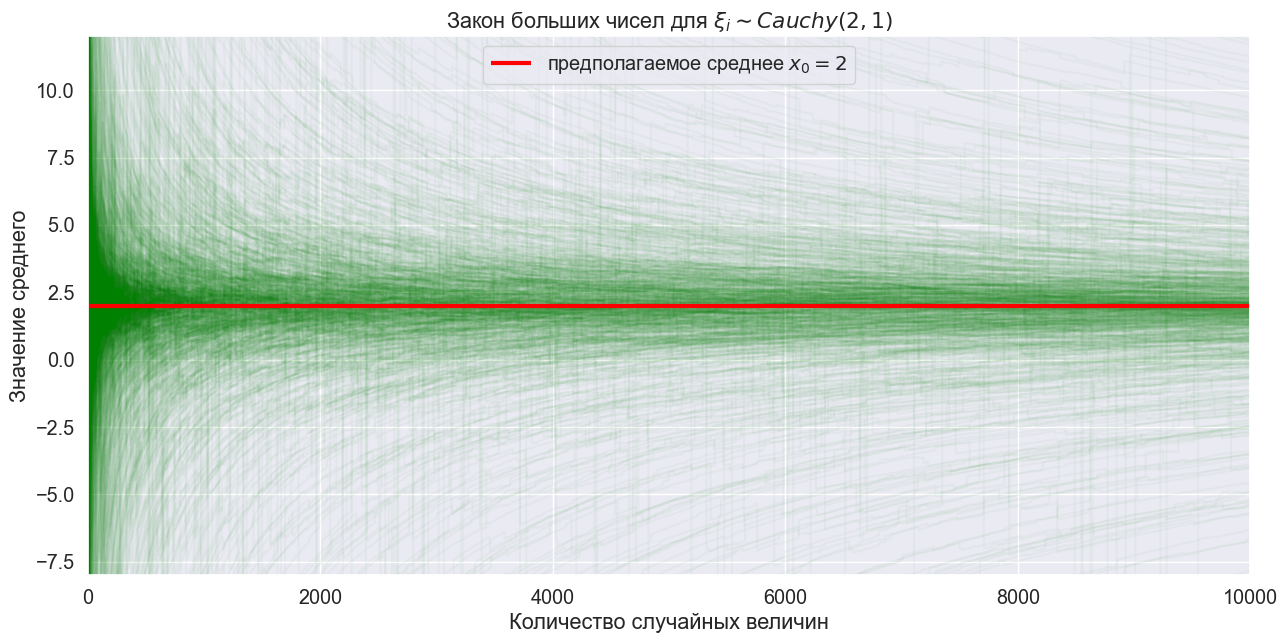

In [83]:
plt.figure(figsize=(15, 7))

# График для каждой выборки отдельно
for i in range(samples_count):
    plt.plot(np.arange(size) + 1, cum_means[i], color='green', alpha=0.03)

plt.hlines(2, 0, size, color='red', alpha=1, lw=3, label='предполагаемое среднее $x_0=2$')
plt.xlabel('Количество случайных величин')
plt.ylabel('Значение среднего')
plt.title('Закон больших чисел для $\\xi_i \\sim Cauchy(2, 1)$')
plt.xlim((0, size));
plt.ylim((-8, 12));
plt.legend(loc='upper center');

Конечно, согласованность с предположением прослеживается: стремление к 2 есть, но, если уместно так выразиться, в терминах графика стремление поточеченое, но не равномерно, как в случае $Bern(0.5),\ \mathcal{N}(0,1),\ Exp(0,1),\ Pois(1)$ с лекции. Такой результат определённо отрицателен в пользу справедливости предположения. Гипотеза опровергнута.

**3.** Аналогичным образом проведите эксперимент по изучению зависимости *выборочной* медианы от размера выборки. Медиану по выборке можно посчитать с помощью <a target="_blank" href="https://numpy.org/doc/stable/reference/generated/numpy.median.html">`np.median`</a>.

Проверим выполнено ли предположение равенства медианы выборки 2 в случае распределения Коши с $loc=2$.

In [84]:
size = 1000  # количество случайных величин
samples = sps.cauchy.rvs(size=size, loc=2, scale=1)
cum_medians = [np.median(samples[0:i+1]) for i in range(size)]

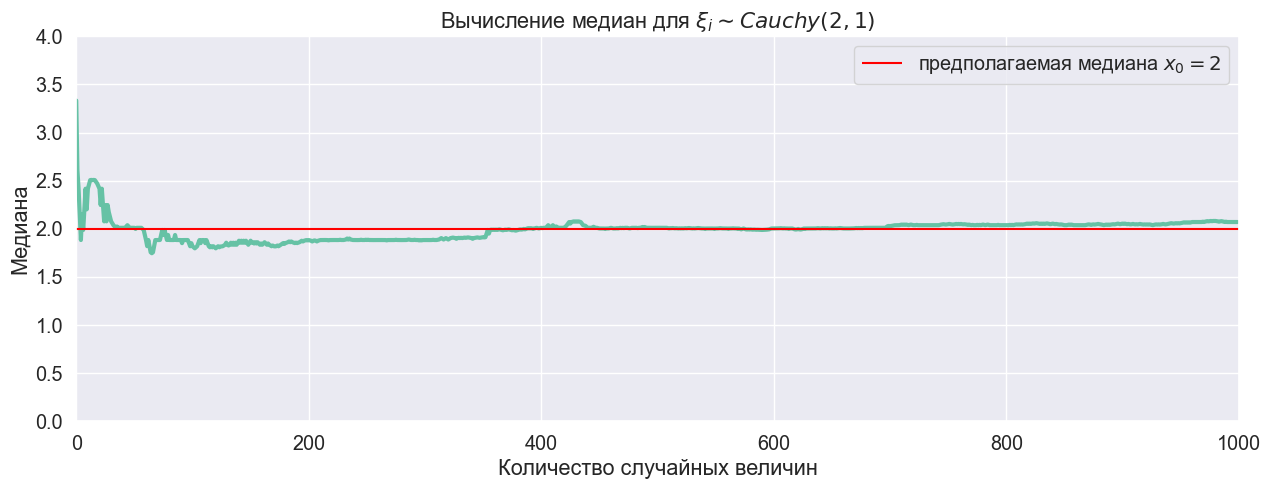

In [85]:
plt.figure(figsize=(15, 5))
plt.plot(cum_medians, lw=3)
plt.hlines(2, 0, size, color='red', alpha=1, label='предполагаемая медиана $x_0=2$')
plt.xlabel('Количество случайных величин')
plt.ylabel('Медиана')
plt.title('Вычисление медиан для $\\xi_i \\sim Cauchy(2, 1)$')
plt.xlim((0, size));
plt.ylim((0, 4));
plt.legend(loc='best');

График даёт значительную уверенность в справедливости предположения.
Вновь проведём 1000 экспериментов:

In [86]:
samples_count = 1000  # количество выборок
size = 1000  # количество случайных величин в каждой выборке
samples = sps.cauchy.rvs(size=(samples_count, size), loc=2, scale=1)
cum_medians = np.empty((samples_count, size))
for i in range(samples_count):
    for j in range(size):
         cum_medians[i][j] = np.median(samples[i][0:j+1])
cum_medians

array([[-1.46144552,  4.49054141, 10.44252834, ...,  2.00189854,
         2.00505749,  2.00534779],
       [20.24282213, 10.66585702,  2.74767092, ...,  1.99331936,
         1.99238339,  1.99331936],
       [ 1.43749965,  1.76741657,  2.09733348, ...,  1.92666274,
         1.92773075,  1.92666274],
       ...,
       [ 0.29162704,  1.44469901,  1.96767029, ...,  2.02225459,
         2.02025632,  2.01891847],
       [ 1.55740593,  8.55154254,  2.68753326, ...,  2.06138823,
         2.0625201 ,  2.0637239 ],
       [ 1.19079382,  3.10120659,  2.22950601, ...,  2.02757054,
         2.0254845 ,  2.02757054]])

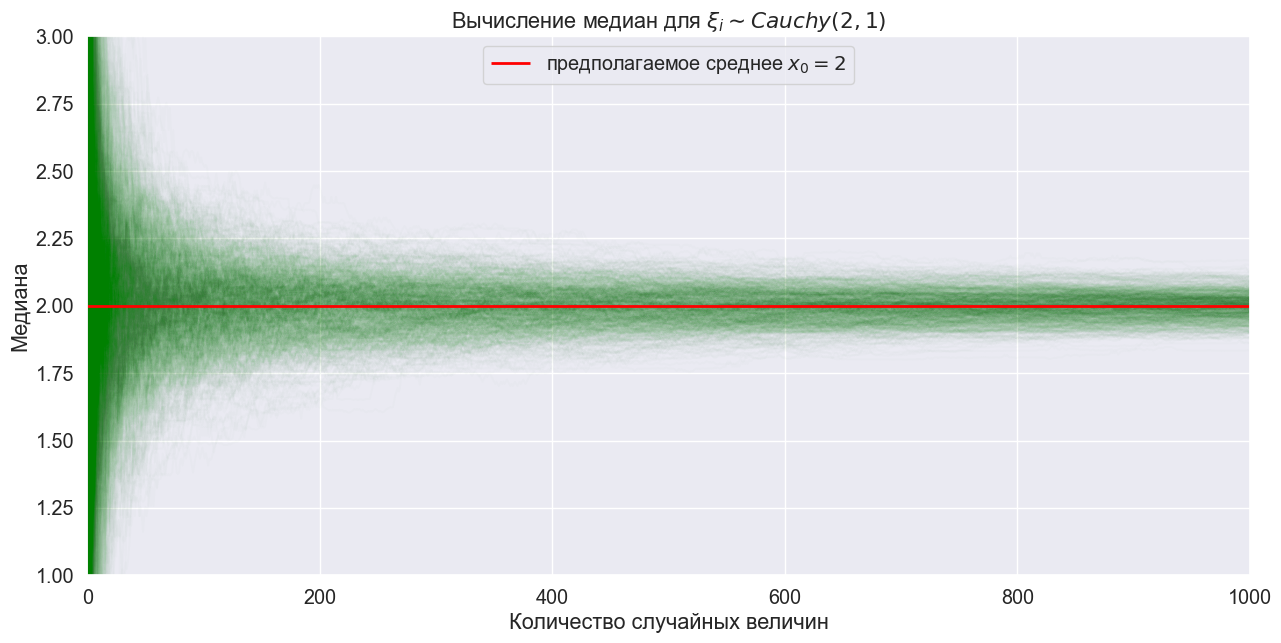

In [87]:
plt.figure(figsize=(15, 7))

# График для каждой выборки отдельно
for i in range(samples_count):
    plt.plot(np.arange(size) + 1, cum_medians[i], color='green', alpha=0.01)

plt.hlines(2, 0, size, color='red', alpha=1, lw=2, label='предполагаемое среднее $x_0=2$')
plt.xlabel('Количество случайных величин')
plt.ylabel('Медиана')
plt.title('Вычисление медиан для $\\xi_i \\sim Cauchy(2, 1)$')
plt.xlim((0, size));
plt.ylim((1, 3));
plt.legend(loc='upper center');

Превосходно! Гипотезу считаю подтверждённой. Медиана равна $x_0=2$.

#### <font color="green"><i>**Выводы:**</i></font>
Исследование распределения Коши показало, что его графическое отличие от нормального распределения(тяжёлые хвосты) не лишено оснований. Закон больших чисел для распределения Коши в рассмотренном случае $loc=2$ не выполнен. Однако, при этом значение медианы выборки согласуется с предполагаемым: 2.

### <font color="orange"><i>Сложная часть</i></font>

### Задача 3.

Перед выполнением этой задачи настоятельно рекомендуется посмотреть <a href="https://miptstats.github.io/courses/ad_fivt/lec3_LLN.html">ноутбук</a> с лекции про закон больших чисел.

На практике не редко возникает вопрос &mdash; **сколько времени потребуется на сбор данных, чтобы оценить среднее с достаточной точностью**. Для ответа на этот вопрос можно использовать различные теоретические оценки, в частности, неравенство Чебышева.

Другой способ &mdash; смоделировать большое количество выборок.
Возьмем в качестве меры отклонения от среднего *среднее значение модуля отклонения от среднего*, то есть
$$F(n) = \frac{1}{K}\sum\limits_{j=1}^{K} \left| S_{nj} - a \right|,$$
где $a$ &mdash; математическое ожидание элемента выборки, $S_{nj}$ &mdash; *выборочное* среднее $n$ элементов в $j$-й выборке, а $K$ &mdash; общее количество выборок.

**1.** Рассмотрим распределения $Bern(a)$ для $a=0.5$. Пусть для нас допустимо отклонение на 0.02, иначе говоря при *истинном* среднем 0.5 мы считаем достаточно точными значения *выборочного* среднего от 0.48 до 0.52. Тогда в качестве *приближения* необходимого размера выборок можно взять наименьшее значение $n$, при котором $F(n) \leqslant 0.02$.

Реализуйте данный эксперимен для $K=500$  и найдите значение $n$. Визуализируйте зависимость $F(n)$ от $n$ в обычном и логарифмическом масштабах (по тем осям, по которым это имеет смысл).

Для реализации без циклов стоит генерировать достаточно большие выборки и использовать функцию `np.where`.

##### <font color="green"><i>**Замечание:**</i></font>
Для бернулевского распределения с параметром p:  мат.ожидание равно p. И наоборот, если мат. ожидание бернулевского распределения равно p, то p это его параметр.

In [88]:
K = 500  # количество выборок
size = 1000  # количество случайных величин в каждой выборке
samples = sps.bernoulli.rvs(size=(K, size), p=0.5)
cum_means = np.abs(samples.cumsum(axis=1)/(np.arange(size) + 1) - 0.5) # a=0.5
df = pd.DataFrame(cum_means.transpose())
df['F(n)'] = df.sum(axis=1)/K
F = pd.DataFrame(df['F(n)'])
F

,F(n)
0,0.500000
1,0.242000
2,0.244000
3,0.191000
4,0.184800
...,...
995,0.012526
996,0.012554
997,0.012537
998,0.012565


In [89]:
# нахожу минимальное подходящее n: выбираю из таблицы подходящие строки, беру значение в первой
suitable = df[df['F(n)'] <= 0.02]
strange = pd.DataFrame(suitable['F(n)']).head(1).index.tolist()
string = [str(integer) for integer in strange]
string = "".join(string)
n = int(string)
n

393

##### <font color="green"><i>Наименьший подходящий размер выборки: n=433</i></font>

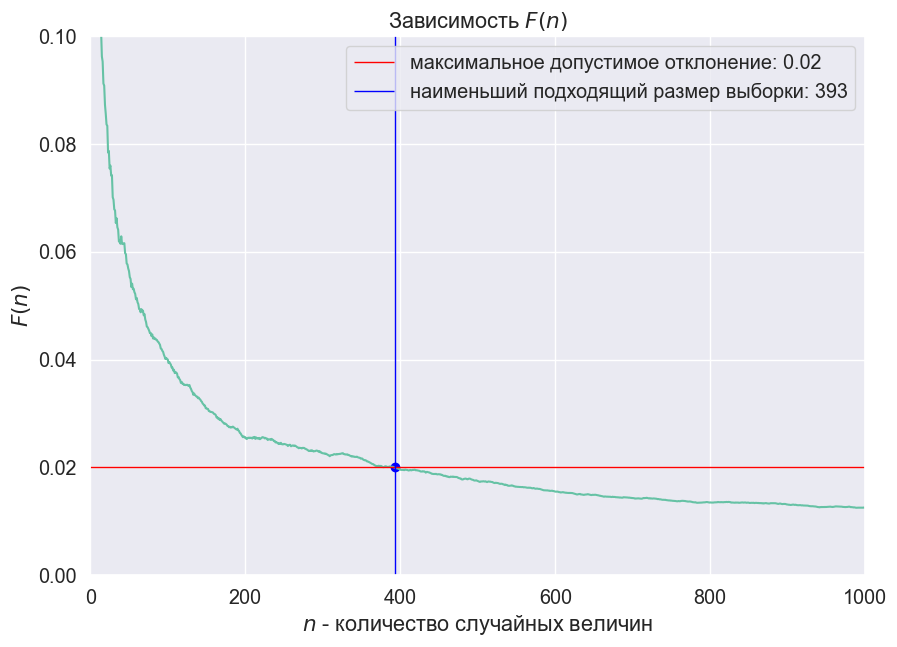

In [90]:
plt.figure(figsize=(10,7))
plt.plot(F)
plt.hlines(0.02, 0, size, color='red', alpha=1, lw=1, label='максимальное допустимое отклонение: 0.02')
plt.vlines(n, 0, size, color='blue', alpha=1, lw=1, label='наименьший подходящий размер выборки: %.0f' %n)
plt.scatter(n, 0.02, color='blue', alpha=1)
plt.xlabel('$n$ - количество случайных величин')
plt.ylabel('$F(n)$')
plt.title('Зависимость $F(n)$')
plt.xlim((0, size));
plt.ylim((0, 0.1));
plt.legend(loc='upper right');
plt.yscale('linear')

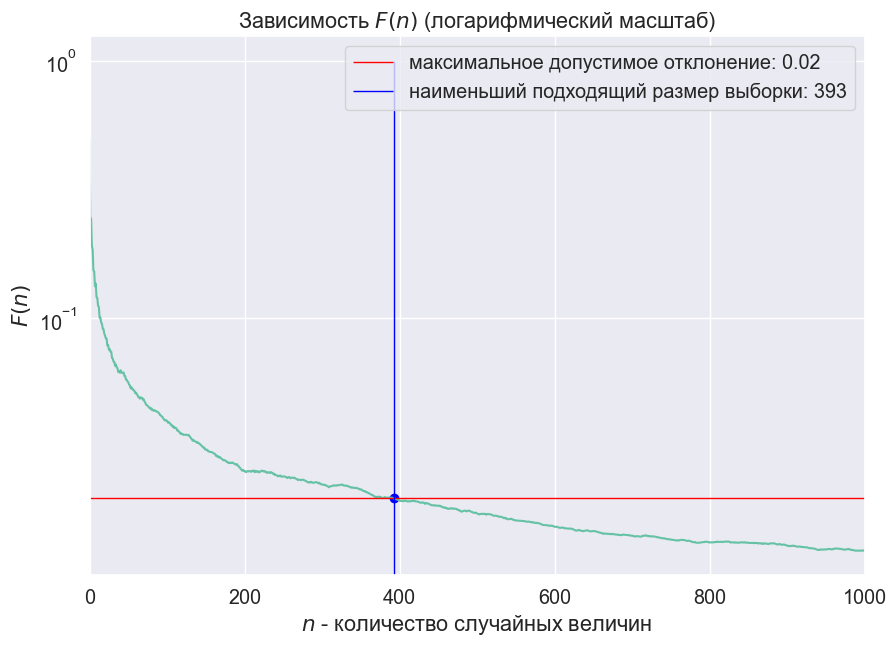

In [91]:
plt.figure(figsize=(10,7))
plt.plot(F)
plt.hlines(0.02, 0, size, color='red', alpha=1, lw=1, label='максимальное допустимое отклонение: 0.02')
plt.vlines(n, 0, 1, color='blue', alpha=1, lw=1, label='наименьший подходящий размер выборки: %.0f' %n)
plt.scatter(n, 0.02, color='blue', alpha=1)
plt.xlabel('$n$ - количество случайных величин')
plt.ylabel('$F(n)$')
plt.title('Зависимость $F(n)$ (логарифмический масштаб)')
plt.xlim((0, size));
plt.legend(loc='upper right');
plt.yscale('log')

**2.** Повторите данный эксперимент для значений $a$ от 0.05 до 0.95 с шагом 0.05. Визуализируйте зависимость необходимого размера выборки $n$ от значения $a$.

При реализации можно сделать цикл по значениям $a$.

In [92]:
plt.style.available # выбрал цвет палитры поярче, чтобы различать цвета на графике

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

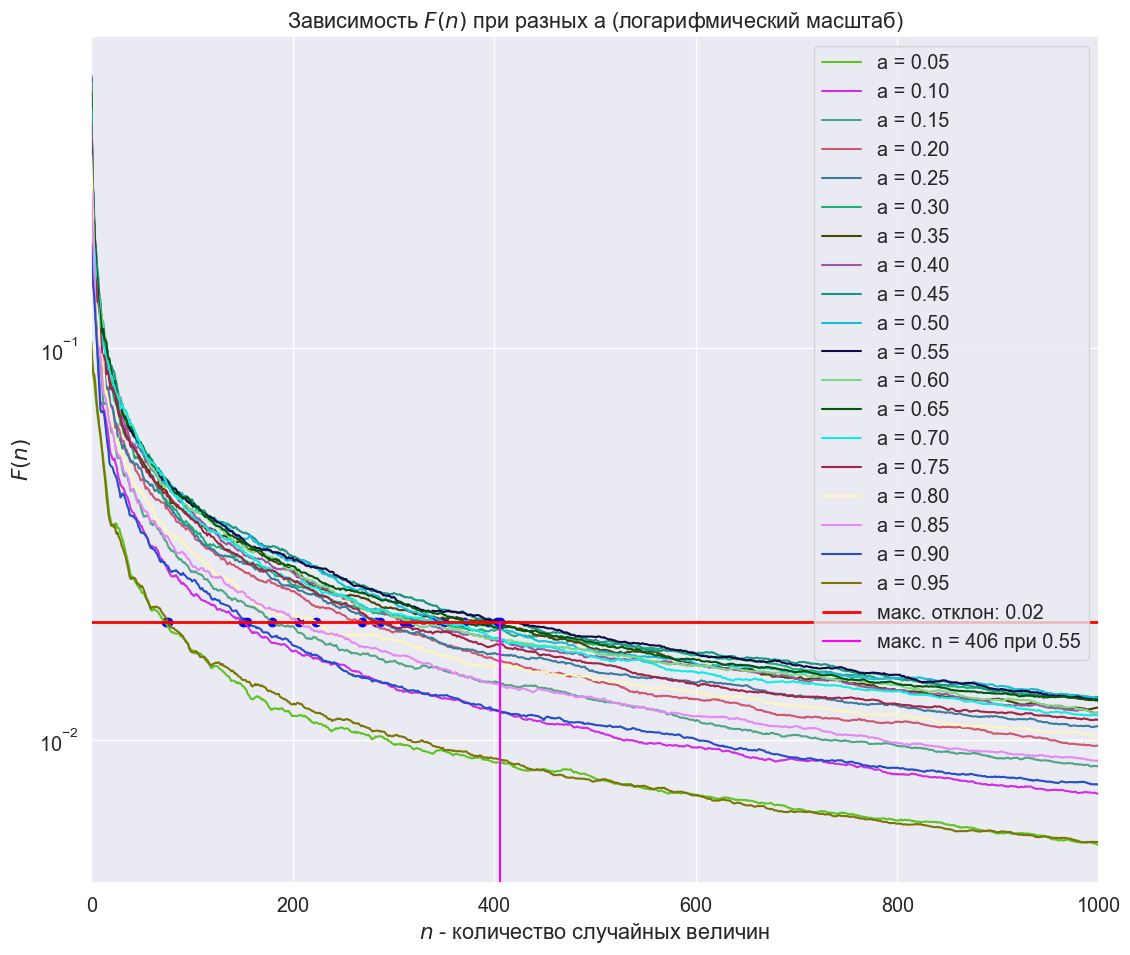

In [93]:
K = 500  # количество выборок
plt.figure(figsize=(13,11))
plt.style.use('seaborn-bright')
max_n = 0
max_a = 0
for i in range(5, 100, 5):
    a = i/100
    size = 1000  # количество случайных величин в каждой выборке
    samples = sps.bernoulli.rvs(size=(K, size), p=a)
    cum_means = np.abs(samples.cumsum(axis=1)/(np.arange(size) + 1) - a)
    df = pd.DataFrame(cum_means.transpose())
    df['F(n)'] = df.sum(axis=1)/K
    F = pd.DataFrame(df['F(n)'])
    plt.plot(F, color=np.random.rand(3,), label='a = %.2f' %a)
    suitable = df[df['F(n)']<=0.02]
    strange = pd.DataFrame(suitable['F(n)']).head(1).index.tolist()
    string = [str(integer) for integer in strange]
    string = "".join(string)
    n = int(string)
    plt.scatter(n, 0.02, color='blue', alpha=1) # точки пересечения графиков с 0.02
    if max_n < n:
        max_n, max_a = n, a

plt.hlines(0.02, 0, size, color='red', alpha=1, lw=2, label='макс. отклон: 0.02')
plt.vlines(max_n, 0, 0.02, color='magenta', alpha=1, label='макс. n = %.0f при %.2f' %(max_n,max_a))
plt.xlabel('$n$ - количество случайных величин')
plt.ylabel('$F(n)$')
plt.title('Зависимость $F(n)$ при разных a (логарифмический масштаб)')
plt.xlim((0, size));
plt.legend(loc='best');
plt.yscale('log')

#### <font color="green"><i>**Выводы:**</i></font>
Из графика видно, что чем ближе a к $0.5$ (то есть чем меньше $|a-0.5|$) тем больше минимальное допустимое n -- размер выборки. И соответственно максимум n достигается в $a=0.5$.